In [59]:
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('Kepler-37 d', author="Kepler", quarter=4, cadence="long").download(quality_bitmask='hardest')

In [60]:
tpf

KeplerTargetPixelFile Object (ID: 8478994)

In [61]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)


In [62]:
lc.meta['MISSION']


'Kepler'

In [63]:
lc.meta['QUARTER']


4

In [64]:
lc.time


<Time object: scale='tdb' format='bkjd' value=[352.37658855 352.3970217  352.45832115 ... 442.16251459 442.18294887
 442.20338304]>

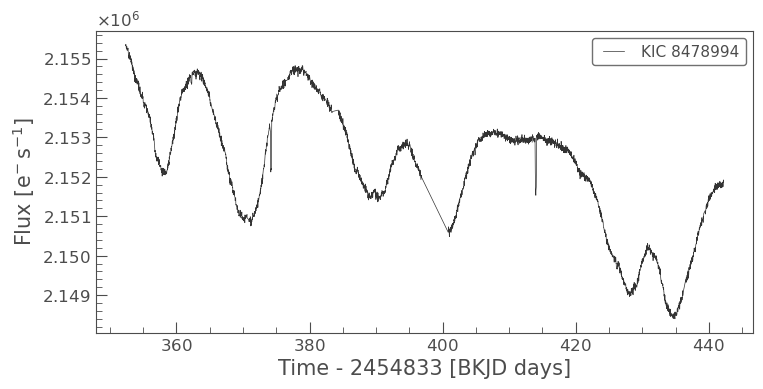

In [65]:
%matplotlib inline
lc.plot();

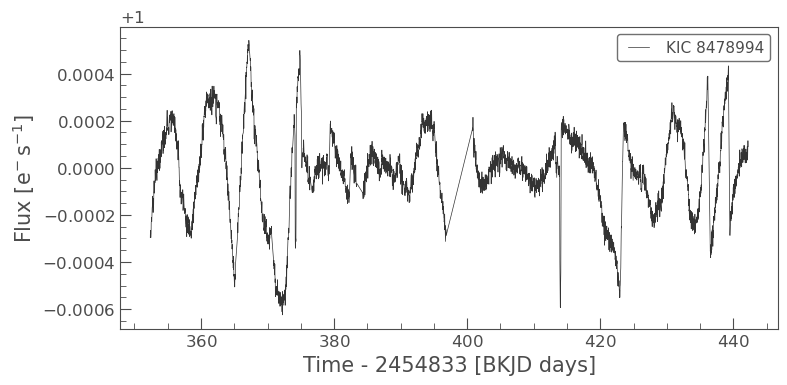

In [66]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

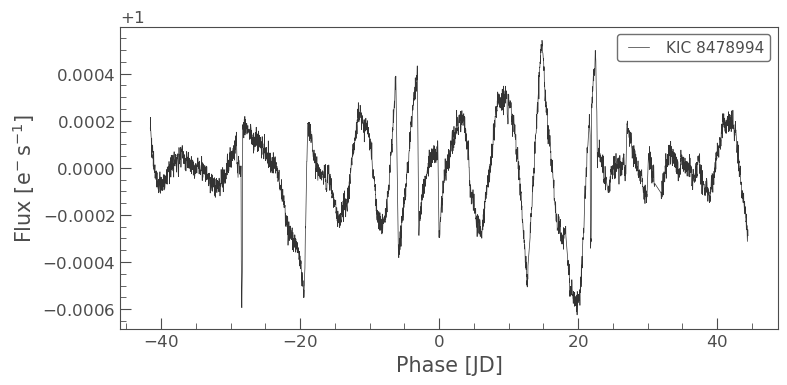

In [68]:
folded_lc = flat_lc.fold(period=90)
folded_lc.plot();

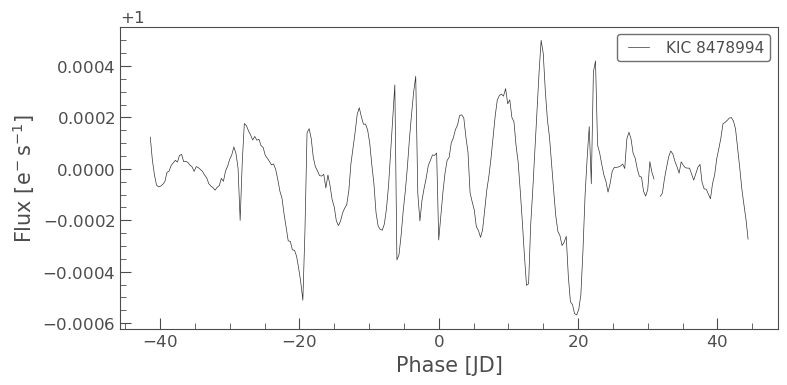

In [69]:
binned_lc = folded_lc.bin(time_bin_size=0.3)
binned_lc.plot();

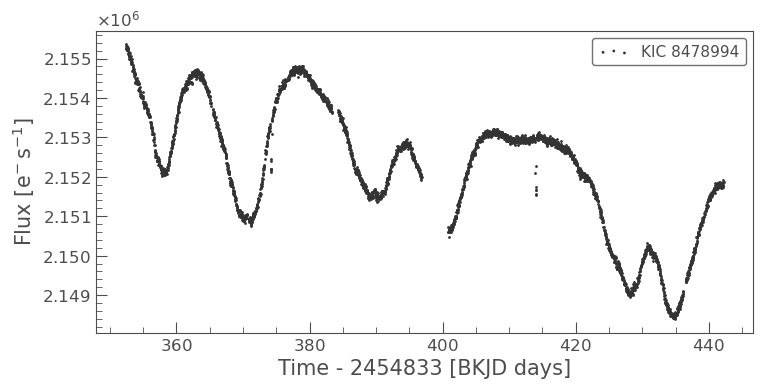

In [70]:
%matplotlib inline
lc.scatter();

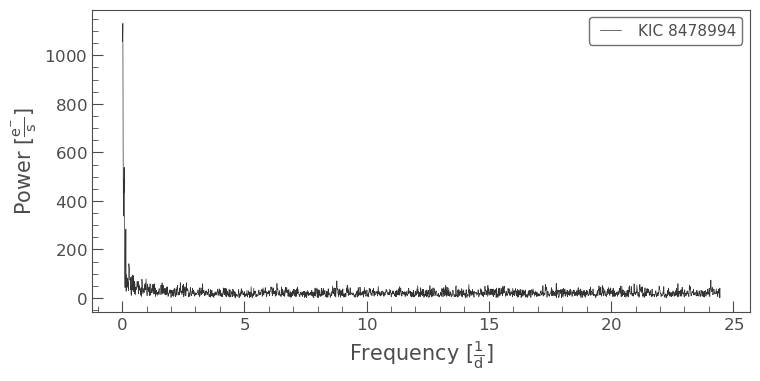

In [71]:
pg = lc.to_periodogram(oversample_factor=1)
pg.plot();

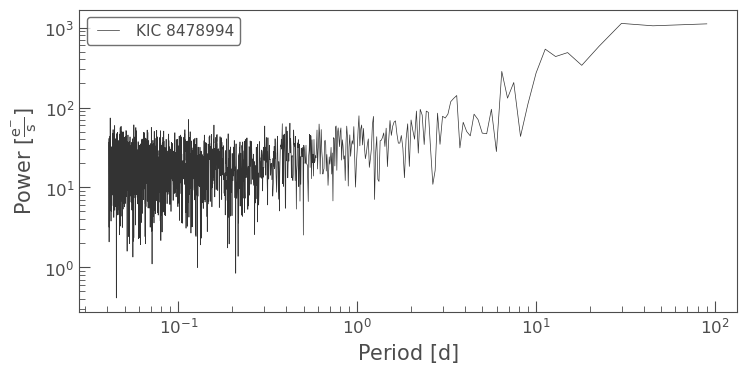

In [72]:
pg.plot(view='period', scale='log');

In [73]:
pg.period_at_max_power


<Quantity 29.94226483 d>

O periodo máximo é de 29.942265 d

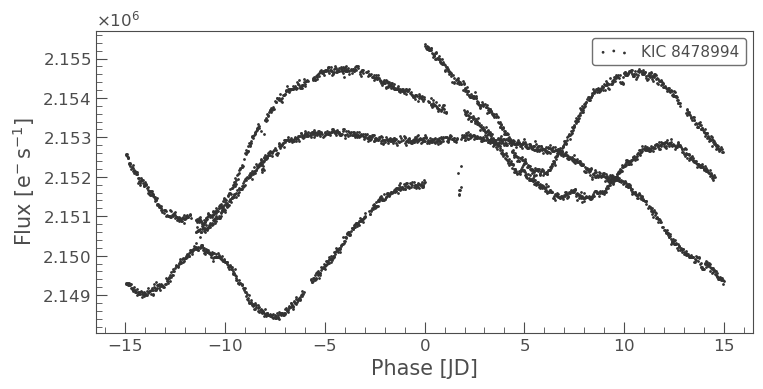

In [74]:
lc.fold(period=pg.period_at_max_power).scatter();


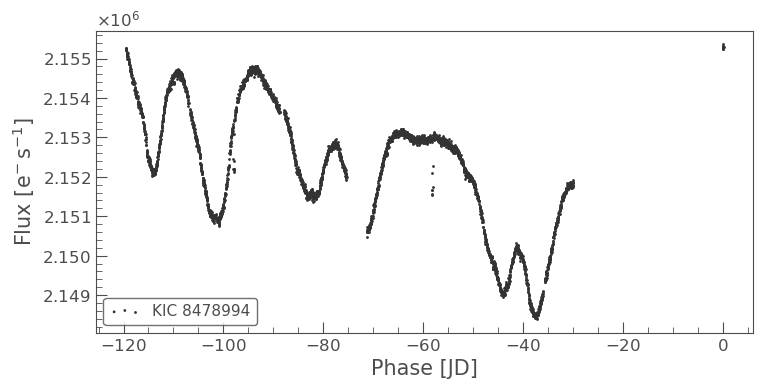

In [75]:
lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();


In [76]:
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.period_at_max_power

<Quantity 1.02127359 d>

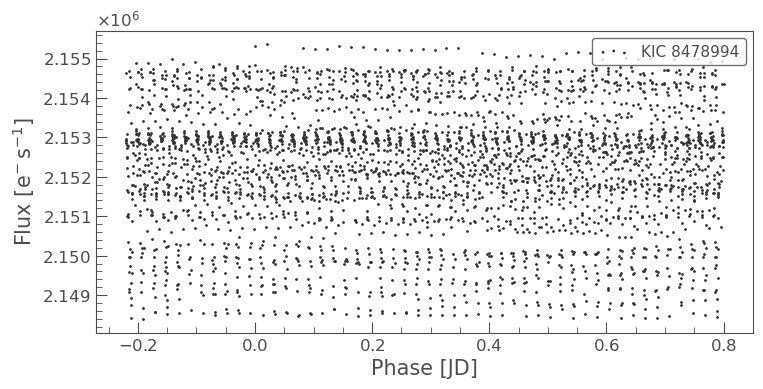

In [81]:
lc.fold(period=pg.period_at_max_power, wrap_phase=0.8).scatter();
